In [2]:
import pathlib
import numpy as np
import scipy as sp
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches
import mplstereonet
import skimage.exposure
import harmonica as hm
import verde as vd

import zipfile
import os
import micromag as mg

import time
import warnings
import rich.progress

/tmp/ipykernel_4960/3693383932.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


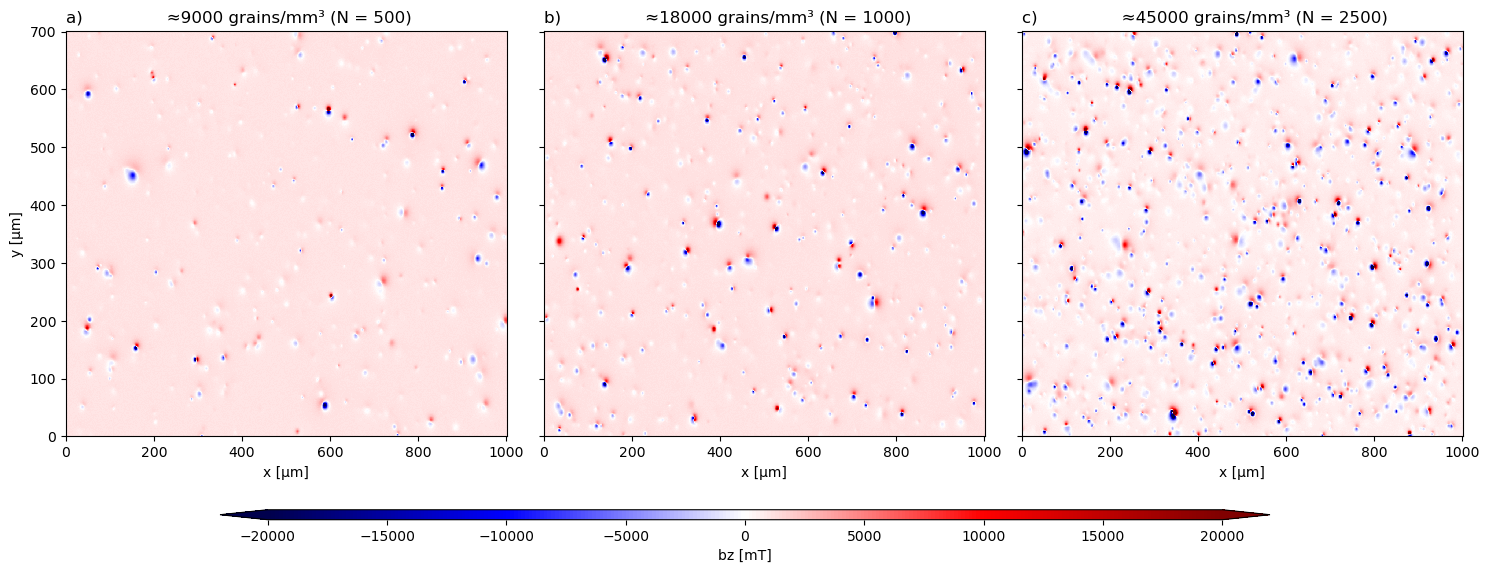

In [34]:
# Lista com os nomes das pastas zipadas
zip_files = ["simulations_9k_grains_per_mm3.zip", 
             "simulations_18k_grains_per_mm3.zip",
             "simulations_45k_grains_per_mm3.zip"]
titles = ["a)                ≈9000 grains/mm³ (N = 500)", 
          "b)                ≈18000 grains/mm³ (N = 1000)", 
          "c)                ≈45000 grains/mm³ (N = 2500)"]
# Diretório temporário para extração
extract_dir = "temp_extracted"

# Criar figura para os subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, )
images = []
for i, (zip_file, title) in enumerate(zip(zip_files, titles)):
    # Criar um diretório específico para extração
    extract_path = os.path.join(extract_dir, zip_file.replace(".zip", ""))
    os.makedirs(extract_path, exist_ok=True)
    
    # Extrair os arquivos
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    # Procurar o primeiro arquivo NetCDF dentro da pasta extraída
    nc_files = [f for f in os.listdir(extract_path) if f.endswith(".nc")]
    
    if nc_files:
        nc_path = os.path.join(extract_path, nc_files[-3])  # Pega o primeiro encontrado
        
        # Ler o NetCDF com xarray
        ds = xr.open_dataset(nc_path)

        # Plotar pcolormesh(data.bz)
        im = axes[i].pcolormesh(ds.bz, cmap="seismic", vmax=20000, vmin=-20000)
        axes[i].set_title(title, loc='left')
        images.append(im)

        # Adicionar colorbar para cada subplot
cbar = fig.colorbar(images[0], ax=axes, extend='both', 
                    orientation='horizontal', fraction=0.09, pad=0.1,
                   cax=fig.add_axes([0.15, -0.05, 0.7, 0.02]))
cbar.set_label("bz [mT]")
axes[0].set_ylabel('y [µm]')
axes[0].set_xlabel('x [µm]')
axes[1].set_xlabel('x [µm]')
axes[2].set_xlabel('x [µm]')

# Ajustar layout
plt.tight_layout()
plt.show()